In [1]:
%matplotlib inline
#%matplotlib notebook
#https://drive.google.com/drive/folders/1qAN0YS7cR978CSuFOtIhAzv9RN_wBfbT

In [2]:
import cytoflow as flow
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib
import scipy.stats as stats
import scipy as sp
from scipy.stats.mstats import gmean
import scipy.optimize as opt
import numpy as np
from numpy import median
matplotlib.rc('figure', dpi = 160)

# Import samples and specify experimental condtions

sets the conditions of the tube

In [3]:
inputs = [
    #   0  ^9 ^8 ^7   0  ^9 ^8 ^7
    #1  2  3  4  5    6  7  8  9
    #  10 11 12 13   14 15 16 17
    #  18 19 20 21   22 23 24 25
    
    #  26 27 28 29   
    #  30 31 32 33
    #  34 35 36 37
    
    
   
    
    
    ["LuxR_LuxI_Tube_001.fcs",0,0,'WT'],
    
    ["TraR_TraI"+"_Tube_002.fcs",0,0,'Tra_rep1'],
    ["TraR_TraI"+"_Tube_003.fcs",1e-9,0,'Tra_rep1'],
    ["TraR_TraI"+"_Tube_004.fcs",1e-8,0,'Tra_rep1'],
    ["TraR_TraI"+"_Tube_005.fcs",1e-7,0,'Tra_rep1'],
    ["TraR_TraI"+"_Tube_010.fcs",0,0.005,'Tra_rep1'],
    ["TraR_TraI"+"_Tube_011.fcs",1e-9,0.005,'Tra_rep1'],
    ["TraR_TraI"+"_Tube_012.fcs",1e-8,0.005,'Tra_rep1'],
    ["TraR_TraI"+"_Tube_013.fcs",1e-7,0.005,'Tra_rep1'],
    ["TraR_TraI"+"_Tube_018.fcs",0,0.5,'Tra_rep1'],
    ["TraR_TraI"+"_Tube_019.fcs",1e-9,0.5,'Tra_rep1'],
    ["TraR_TraI"+"_Tube_020.fcs",1e-8,0.5,'Tra_rep1'],
    ["TraR_TraI"+"_Tube_021.fcs",1e-7,0.5,'Tra_rep1'],
    
    ["TraR_TraI"+"_Tube_006.fcs",0,0,'Tra_rep2'],
    ["TraR_TraI"+"_Tube_007.fcs",1e-9,0,'Tra_rep2'],
    ["TraR_TraI"+"_Tube_008.fcs",1e-8,0,'Tra_rep2'],
    ["TraR_TraI"+"_Tube_009.fcs",1e-7,0,'Tra_rep2'],
    ["TraR_TraI"+"_Tube_014.fcs",0,0.005,'Tra_rep2'],
    ["TraR_TraI"+"_Tube_015.fcs",1e-9,0.005,'Tra_rep2'],
    ["TraR_TraI"+"_Tube_016.fcs",1e-8,0.005,'Tra_rep2'],
    ["TraR_TraI"+"_Tube_017.fcs",1e-7,0.005,'Tra_rep2'],
    ["TraR_TraI"+"_Tube_022.fcs",0,0.5,'Tra_rep2'],
    ["TraR_TraI"+"_Tube_023.fcs",1e-9,0.5,'Tra_rep2'],
    ["TraR_TraI"+"_Tube_024.fcs",1e-8,0.5,'Tra_rep2'],
    ["TraR_TraI"+"_Tube_025.fcs",1e-7,0.5,'Tra_rep2'],
    
    ["TraR_TraI"+"_Tube_026.fcs",0,0,'Tra_rep3'],
    ["TraR_TraI"+"_Tube_027.fcs",1e-9,0,'Tra_rep3'],
    ["TraR_TraI"+"_Tube_028.fcs",1e-8,0,'Tra_rep3'],
    ["TraR_TraI"+"_Tube_029.fcs",1e-7,0,'Tra_rep3'],
    ["TraR_TraI"+"_Tube_030.fcs",0,0.005,'Tra_rep3'],
    ["TraR_TraI"+"_Tube_031.fcs",1e-9,0.005,'Tra_rep3'],
    ["TraR_TraI"+"_Tube_032.fcs",1e-8,0.005,'Tra_rep3'],
    ["TraR_TraI"+"_Tube_033.fcs",1e-7,0.005,'Tra_rep3'],
    ["TraR_TraI"+"_Tube_034.fcs",0,0.5,'Tra_rep3'],
    ["TraR_TraI"+"_Tube_035.fcs",1e-9,0.5,'Tra_rep3'],
    ["TraR_TraI"+"_Tube_036.fcs",1e-8,0.5,'Tra_rep3'],
    ["TraR_TraI"+"_Tube_037.fcs",1e-7,0.5,'Tra_rep3'],

   
    


]

       
tubes = []
for filename, ahl, iptg, family in inputs:
    tubes.append(flow.Tube(file = 'data/' + filename, conditions = {'AHL' : ahl, 'IPTG' : iptg, 'Family' : family}))
    
ex = flow.ImportOp(conditions = {'AHL' : 'float', 'IPTG' : 'float', 'Family' : 'str'},
                   tubes = tubes).apply()
       


In [4]:
flow.set_default_scale("log")

# Plot FITC-A histograms for all IPTG and AHL induction conditions

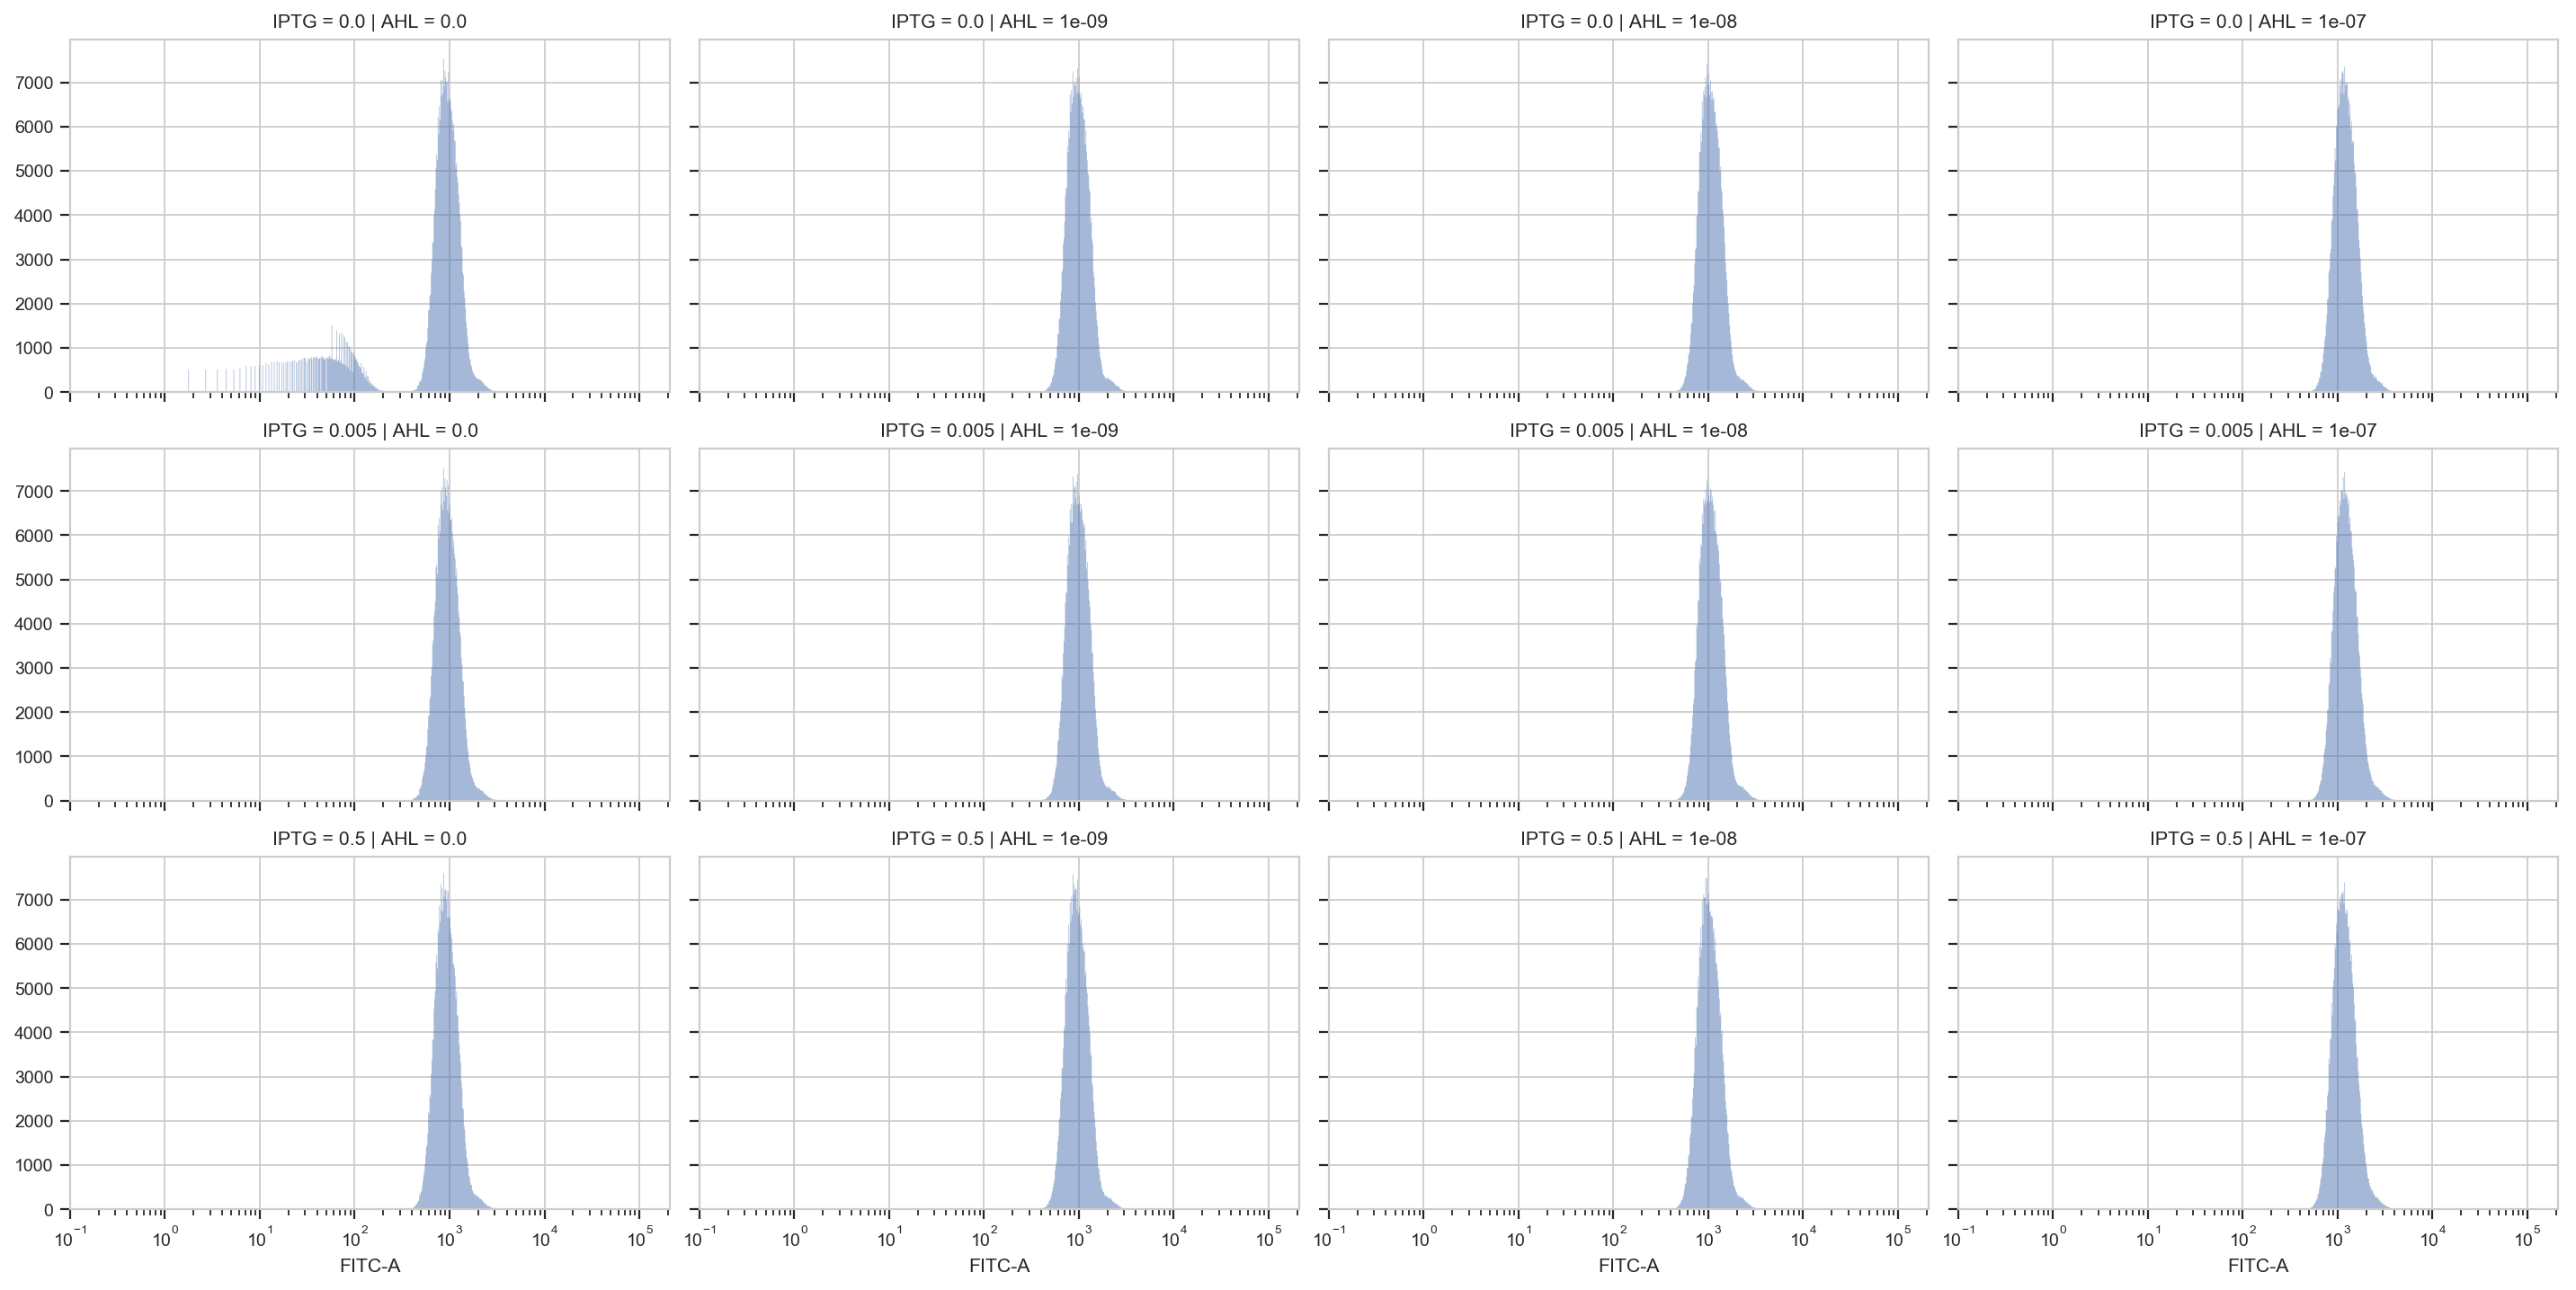

In [5]:

flow.HistogramView(channel = "FITC-A",
                   xfacet = "AHL",
                  yfacet = 'IPTG').plot(ex)

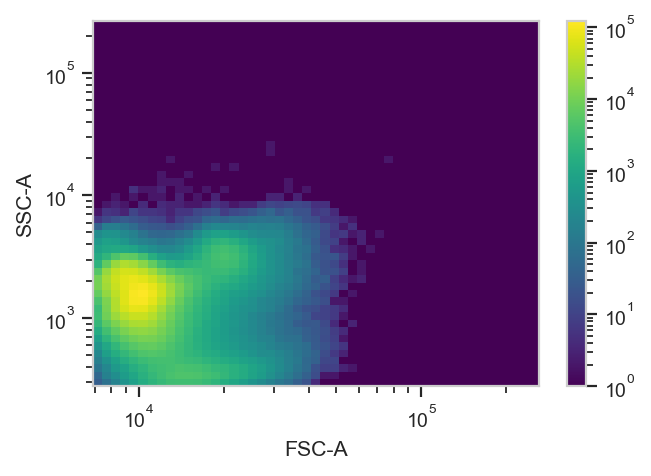

In [6]:
flow.DensityView(xchannel = "FSC-A", 
                 ychannel = "SSC-A",
                 xscale = 'log',
                 yscale = 'log').plot(ex, min_quantile = 0.005)

# Singlet gating to remove doublets

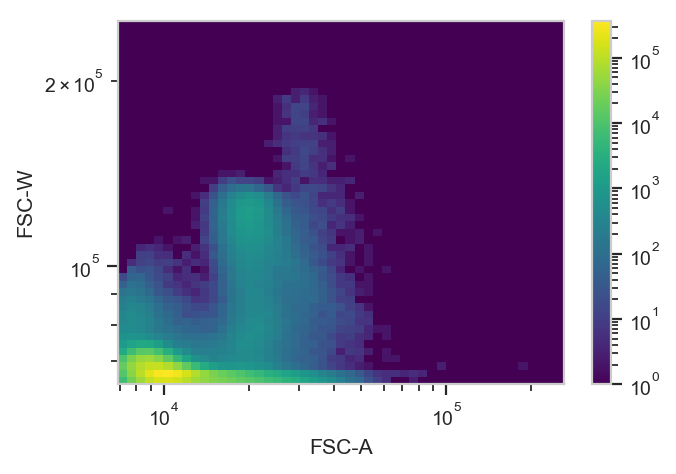

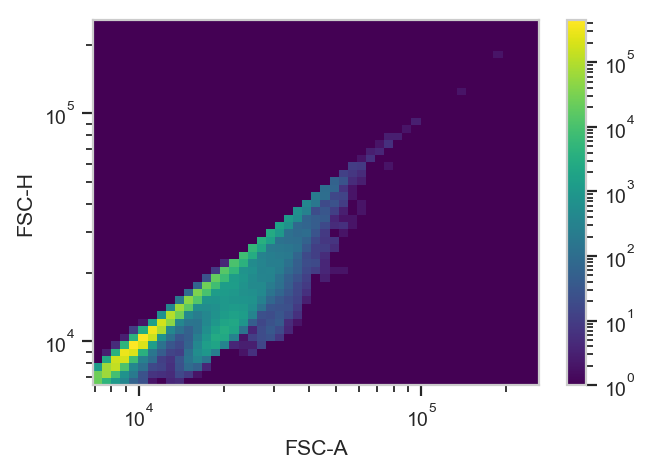

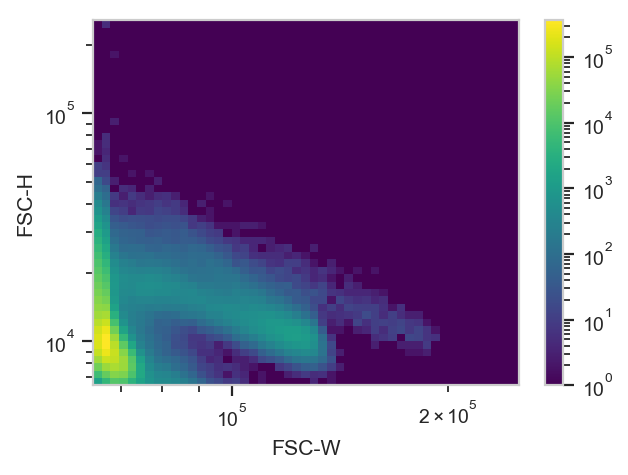

In [7]:

#channels = ['FSC-A','FSC-W','FSC-H','SSC-A','SSC-W','SSC-H']
#perm = combinations(channels,2)
FSC = [('FSC-A','FSC-W'),('FSC-A','FSC-H'),('FSC-W','FSC-H')]

#f, axes = plt.subplots(ncols=4,nrows=4)
#axs = axes.ravel()
for i,(x,y) in enumerate(FSC):  
    flow.DensityView(xchannel = x, 
                ychannel = y,
                xscale = 'log',
                yscale = 'log').plot(ex, min_quantile = 0.005)


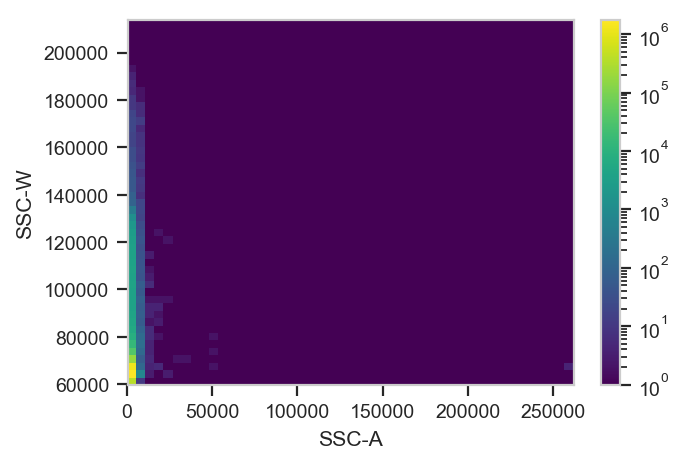

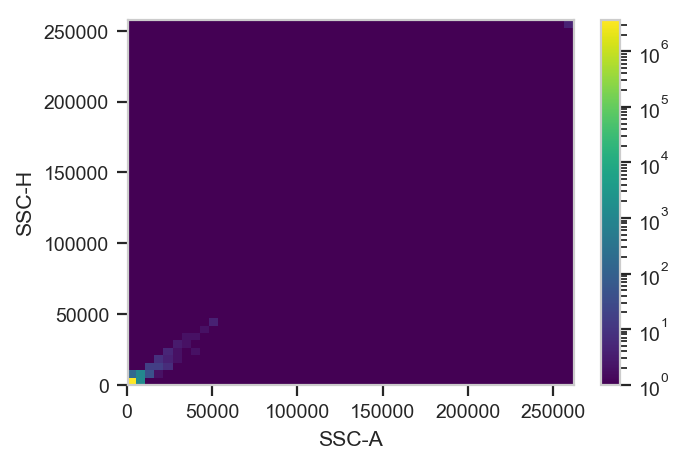

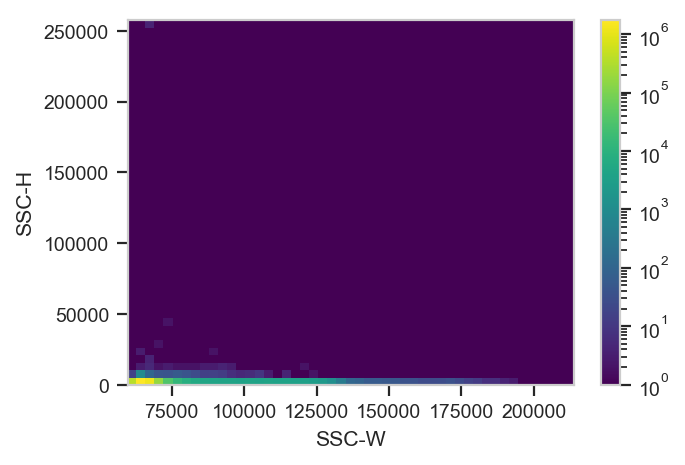

In [8]:
SSC = [('SSC-A','SSC-W'),('SSC-A','SSC-H'),('SSC-W','SSC-H')]
for i,(x,y) in enumerate(SSC):  
    flow.DensityView(xchannel = x, 
                ychannel = y,
                xscale = 'linear',
                yscale = 'linear').plot(ex, min_quantile = 0.005)

## Create and store singlet gate

saves the single data as ex2

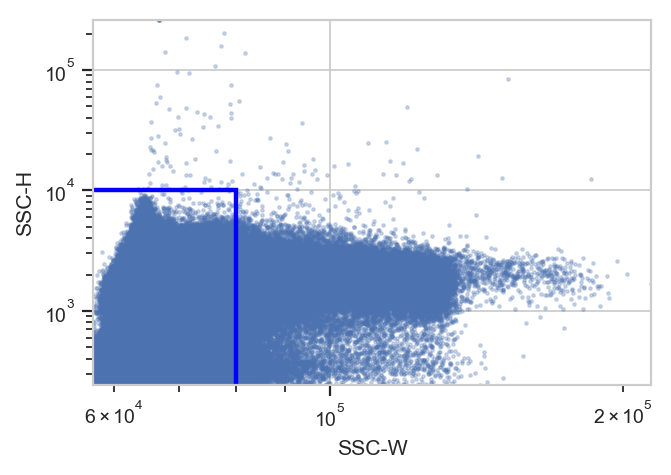

In [9]:
r = flow.Range2DOp(name = "Range2D",
                   xchannel = "SSC-W",
                   xlow = 55000,
                   xhigh = 80000,
                   ychannel = "SSC-H",
                   ylow = 100,
                   yhigh = 10000)
                   
rv = r.default_view(xscale ='log',yscale='log')

rv.plot(ex)
ex2 = r.apply(ex)

## Use a gaussian mixture model to further gate the population

/opt/anaconda3/envs/flow/lib/python3.6/site-packages/cytoflow/operations/base_op_views.py:342: CytoflowViewWarning: Setting 'huefacet' to 'GM_1'


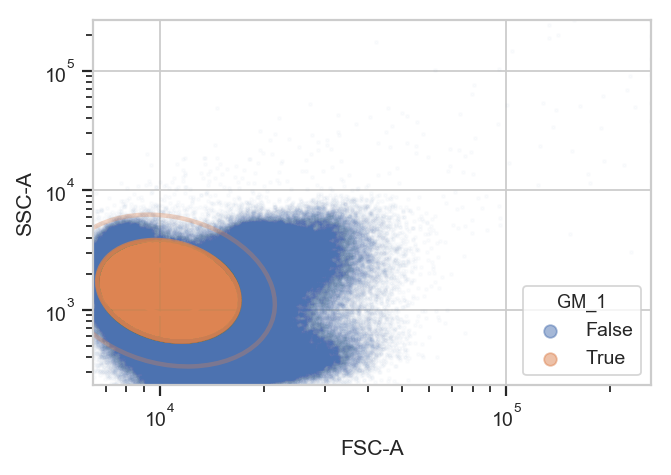

In [10]:
gm = flow.GaussianMixtureOp(name = "GM",
                            channels = ['FSC-A', 'SSC-A'],
                            scale = {'FSC-A' : 'log',
                                     'SSC-A' : 'log'},
                            num_components = 1,
                            sigma = 2)
gm.estimate(ex2)
ex_gm = gm.apply(ex2)
gm.default_view().plot(ex_gm, alpha = 0.02)

/opt/anaconda3/envs/flow/lib/python3.6/site-packages/cytoflow/operations/gaussian.py:529: RuntimeWarning: invalid value encountered in less_equal
/opt/anaconda3/envs/flow/lib/python3.6/site-packages/cytoflow/operations/base_op_views.py:342: CytoflowViewWarning: Setting 'huefacet' to 'GM3_1'


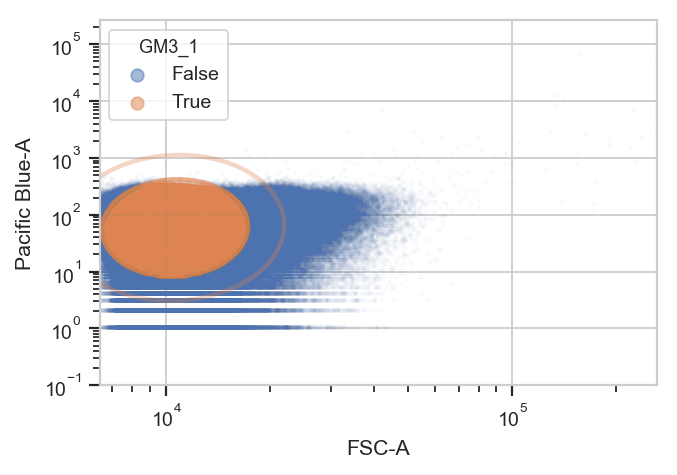

In [11]:
gm3 = flow.GaussianMixtureOp(name = "GM3",
                            channels = ['FSC-A', 'Pacific Blue-A'],
                            scale = {'FSC-A' : 'log',
                                     'Pacific Blue-A' : 'log'},
                            num_components = 1,
                            sigma = 2)
gm3.estimate(ex_gm)
ex_gm2 = gm3.apply(ex_gm)
gm3.default_view().plot(ex_gm2, alpha = 0.02)

In [12]:
df =ex_gm2.data

take the stuff from cytoflow and changing it to datatframe

# filter out events that don't fall within the gates

In [13]:

df = df[(df.GM_1==True) & (df.GM3_1==True) & (df.Range2D==True) & (df['FITC-A'] >0)]
df

,AHL,AmCyan-A,AmCyan-H,AmCyan-W,FITC-A,FITC-H,FITC-W,FSC-A,FSC-H,FSC-W,...,PerCP-Cy5-5-A,PerCP-Cy5-5-H,PerCP-Cy5-5-W,SSC-A,SSC-H,SSC-W,Time,Range2D,GM_1,GM3_1
1,0.000000e+00,184.439987,79.0,153005.812500,89.889999,47.0,125341.093750,11029.700195,10747.0,67259.929688,...,14558.620117,13931.0,68488.539062,1797.799927,1851.0,63652.417969,53.099998,True,True,True
2,0.000000e+00,84.799995,66.0,84203.820312,73.869995,57.0,84932.343750,8979.160156,8845.0,66530.046875,...,9796.229492,8838.0,72641.515625,1131.189941,1213.0,61115.968750,53.099998,True,True,True
3,0.000000e+00,-5.300000,42.0,0.000000,71.199997,57.0,81862.507812,9787.980469,9597.0,66840.171875,...,9289.820312,8318.0,73192.796875,1042.189941,1021.0,66896.140625,53.200001,True,True,True
9,0.000000e+00,122.959991,90.0,89536.734375,89.889999,87.0,67713.007812,9764.299805,9203.0,69533.101562,...,18919.619141,16814.0,73743.085938,2528.489990,2487.0,66629.320312,53.299999,True,True,True
11,0.000000e+00,-31.799999,48.0,0.000000,60.520000,78.0,50849.214844,7961.660156,7802.0,66877.140625,...,7141.359863,7092.0,65992.132812,982.559998,958.0,67216.125000,53.299999,True,True,True
12,0.000000e+00,62.539997,84.0,48793.113281,52.509998,40.0,86032.382812,8751.980469,8508.0,67415.351562,...,13227.179688,12016.0,72141.851562,1255.790039,1208.0,68128.687500,53.299999,True,True,True
15,0.000000e+00,65.719994,171.0,25187.283203,22.250000,80.0,18227.199219,8213.259766,7844.0,68621.140625,...,22712.798828,22079.0,67417.273438,1427.559937,1408.0,66446.429688,53.400002,True,True,True
17,0.000000e+00,-30.739998,78.0,0.000000,32.040001,67.0,31339.904297,10012.940430,9799.0,66966.835938,...,16957.169922,15930.0,69761.781250,2270.389893,2259.0,65866.429688,53.400002,True,True,True
22,0.000000e+00,58.299995,112.0,34113.828125,30.260000,74.0,26798.910156,7489.540039,7054.0,69582.437500,...,19261.378906,18916.0,66732.585938,1794.239990,1710.0,68764.515625,53.500000,True,True,True
24,0.000000e+00,90.099998,71.0,83166.101562,28.480000,134.0,13928.845703,8763.080078,8610.0,66701.179688,...,13099.019531,11939.0,71903.625000,1496.979980,1493.0,65710.703125,53.500000,True,True,True


In [14]:
df.columns 



Index(['AHL', 'AmCyan-A', 'AmCyan-H', 'AmCyan-W', 'FITC-A', 'FITC-H', 'FITC-W',
       'FSC-A', 'FSC-H', 'FSC-W', 'Family', 'IPTG', 'Pacific Blue-A',
       'Pacific Blue-H', 'Pacific Blue-W', 'PerCP-Cy5-5-A', 'PerCP-Cy5-5-H',
       'PerCP-Cy5-5-W', 'SSC-A', 'SSC-H', 'SSC-W', 'Time', 'Range2D', 'GM_1',
       'GM3_1'],
      dtype='object')

In [15]:
data = df[['FITC-A','AHL','IPTG','Family']]
#data.insert(4,'Replicate',2)
#data.to_pickle('../compiled-data/se/lux/LuxSE_2.pkl')
#uncomment these when you are ready to save replicates and compile replicate from other runs

In [16]:
# Subtract WT background from samples
data = df[['FITC-A','AHL','IPTG','Family']]
data['FITC-A'] = data['FITC-A'] - data[data.Family=='WT']['FITC-A'].median()
data['FITC-A'] = data[data['FITC-A'] > 0]['FITC-A']
#data = data[data.Family=='Lux_rep1']
#data.drop('Family',inplace=True,axis=1)

/opt/anaconda3/envs/flow/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/anaconda3/envs/flow/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [17]:
data['FITC-A'].min()

0.8899993896484375

In [18]:
data

,FITC-A,AHL,IPTG,Family
1,33.820000,0.000000e+00,0.0,WT
2,17.799995,0.000000e+00,0.0,WT
3,15.129997,0.000000e+00,0.0,WT
9,33.820000,0.000000e+00,0.0,WT
11,4.450001,0.000000e+00,0.0,WT
12,NaN,0.000000e+00,0.0,WT
15,NaN,0.000000e+00,0.0,WT
17,NaN,0.000000e+00,0.0,WT
22,NaN,0.000000e+00,0.0,WT
24,NaN,0.000000e+00,0.0,WT


# Plot median FITC-A

use median or geometeric mean 

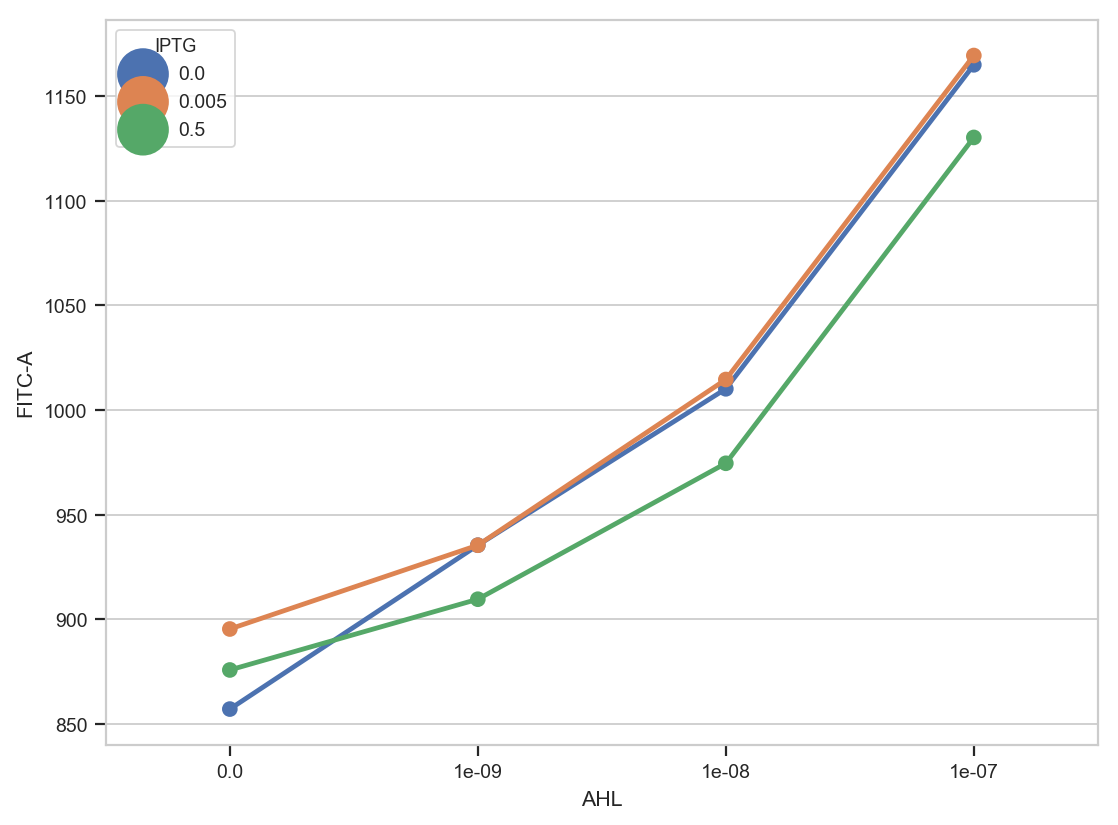

In [19]:
mfi = data.groupby(['AHL','IPTG'])['FITC-A'].median().reset_index()

f, ax = plt.subplots(figsize=(8,6))
sns.pointplot(x='AHL',y='FITC-A',hue='IPTG',data=mfi)
#f.savefig('TraR*.png',dpi=600)

# Plot heatmaps showing absolute and relative induction

Raw signal 

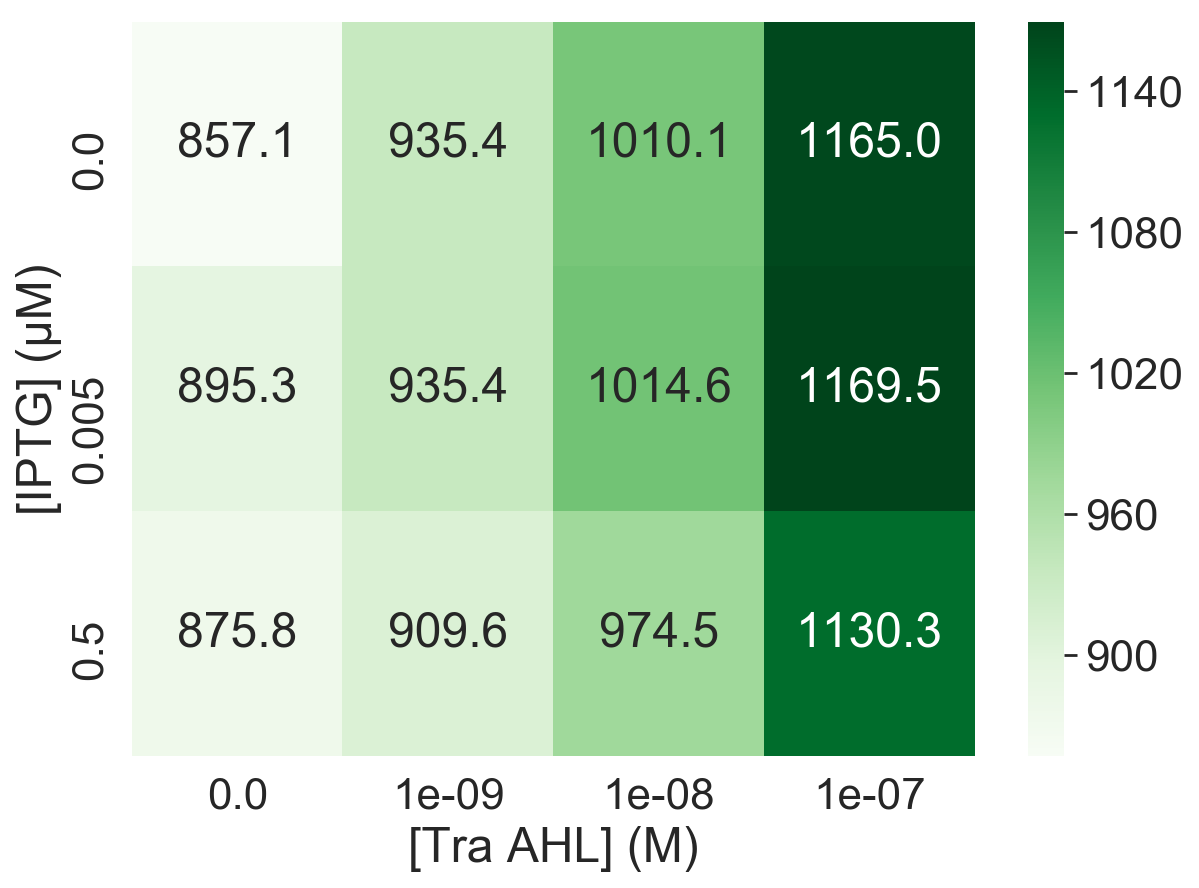

In [20]:
#LasMeans = Las.groupby(['C_ahl','C_iptg']).mean().reset_index()
sns.set(style="white")
sns.set(font_scale=1.8)
#sns.set_style('Talk')
#LasTable = pd.pivot_table(LasMeans,values='FITC-A',index='C_iptg',columns='C_ahl')
f, ax = plt.subplots(figsize=(8,6))
#g = sns.heatmap(LasTable,vmin=0,vmax=100,xticklabels=[0,1e-10,1e-9,1e-7],yticklabels=[0,1e-3,1e-4,1e-5],ax=ax,square=True,cmap='Reds')



#f.savefig('LasHeatmap.png',dpi=600)

#mean['FITC-A']=mean['FITC-A']/mean['FITC-A'].max()*100

piv = mfi.pivot_table(index='IPTG', columns='AHL', values='FITC-A')
g = sns.heatmap(piv, annot=True, fmt=".1f",cmap='Greens')
cbar = g.collections[0].colorbar
#cbar.set_ticks([0, 25, 50, 75,100])
#cbar.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])
ax.set_xlabel(r'[Tra AHL] (M)')
ax.set_ylabel(r'[IPTG] (µM)')
f.tight_layout()
f.savefig('Tra_supernatent.png',dpi=600, transparent=True)

Normalized to highest signal 

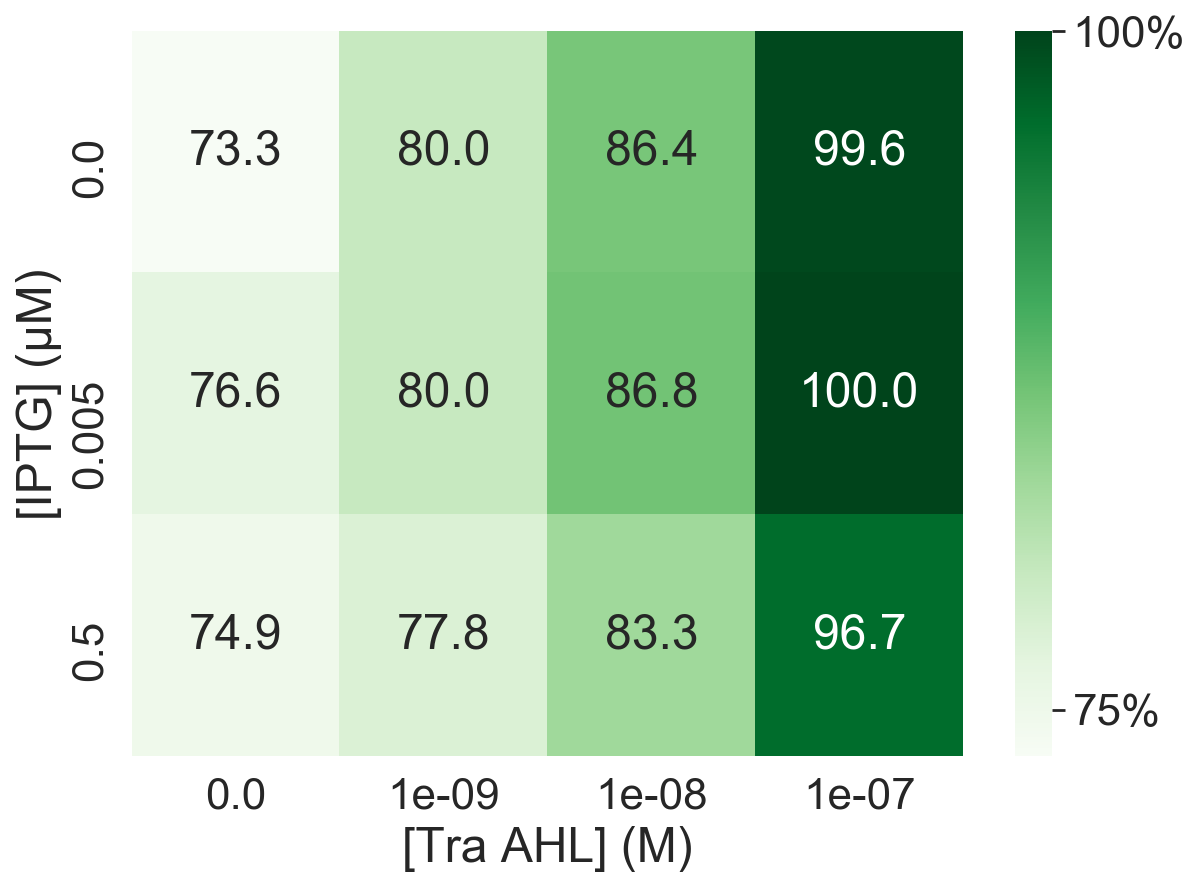

In [21]:
f, ax = plt.subplots(figsize=(8,6))
# normalized
norm = mfi.copy()
norm['FITC-A']=norm['FITC-A']/norm['FITC-A'].max()*100

piv = norm.pivot_table(index='IPTG', columns='AHL', values='FITC-A')
g = sns.heatmap(piv, annot=True, fmt=".1f",cmap='Greens')
cbar = g.collections[0].colorbar
cbar.set_ticks([0, 25, 50, 75,100])
cbar.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])
ax.set_xlabel(r'[Tra AHL] (M)')
ax.set_ylabel(r'[IPTG] (µM)')
f.tight_layout()
f.savefig('Tra_supernatent_percent.png',dpi=600, transparent=True)

# Calculate the on/off ratio and plot

In [22]:

R =[]
for i in mfi.IPTG.unique():
    tmp = mfi[mfi.IPTG ==i]['FITC-A'].max()/mfi[mfi.IPTG ==i]['FITC-A'].min()
    R.append([i,tmp])



In [23]:

R = pd.DataFrame(R,columns=['IPTG','Induction Ratio'])
R

,IPTG,Induction Ratio
0,0.000,1.359294
1,0.005,1.306163
2,0.500,1.290650


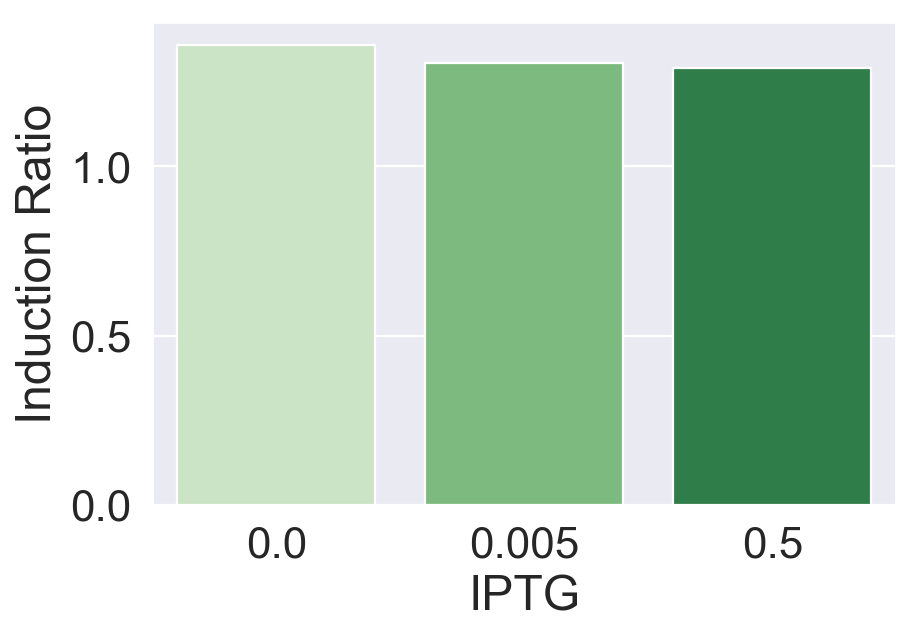

In [24]:
f, ax  = plt.subplots()
sns.barplot(x='IPTG',y='Induction Ratio',data=R,palette='Greens')

STOP HERE